In [79]:
import sys
import pandas as pd

In [80]:
import zipfile
import os
import pandas as pd

dataset_path = "dataset"

class StockData:
    def __init__(self, stock, dataset_path):
        self.csv_path = f"{stock}_data.csv"
        self.stock = stock
        self.dataset_path = dataset_path

    def load_df(self):
        file_path = os.path.join(self.dataset_path, self.csv_path)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            return df
        else:
            print(f"File {file_path} does not exist.")
            return pd.DataFrame()  # Return an empty DataFrame if the file does not exist

# Assuming StockDataList is a list of stock names
StockDataList = [
    "AAL", "AAPL", "AAP", "ABBV", "ABC",
    "ABT", "ACN", "ADBE", "ADI", "ADM",
    "ADP", "ADSK", "ADS", "AEE", "AEP"
]

list_of_df = []
for stock in StockDataList:
    stock_data = StockData(stock, dataset_path)
    df = stock_data.load_df()
    if not df.empty:
        list_of_df.append(df)
    else:
        print(f"No data loaded for stock: {stock}")

# Check if list_of_df is still empty before concatenating
if list_of_df:
    df = pd.concat(list_of_df)
else:
    print("No dataframes to concatenate.")


# Occurence

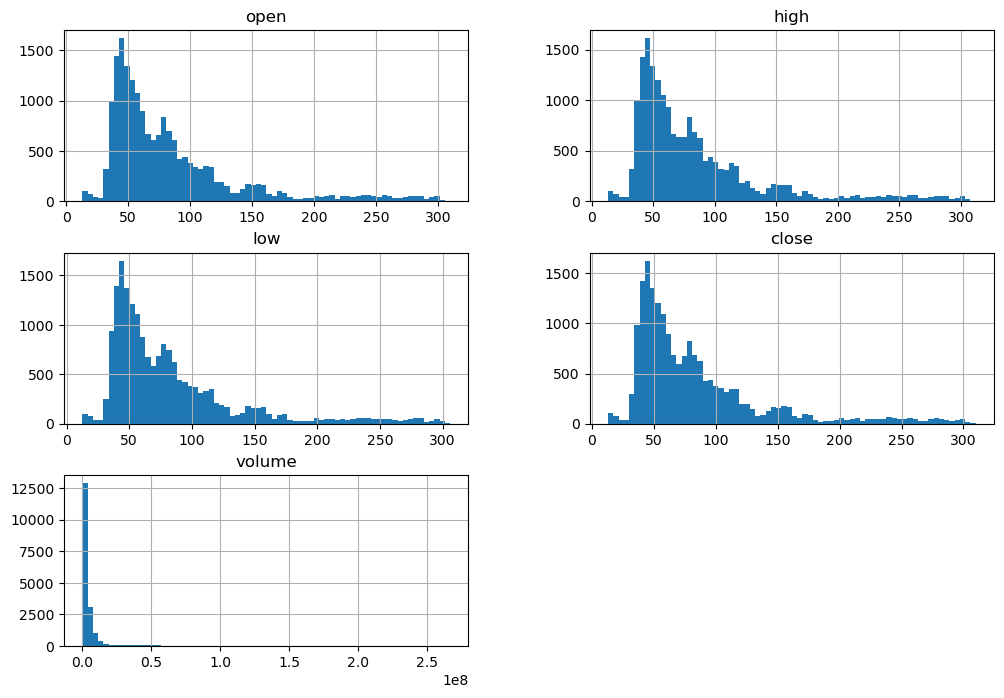

In [81]:
hist = df.hist(bins=70,figsize=(12,8))

In [82]:
df.low.mean()

82.95379017738945

In [83]:
df.high.mean()

84.5003415620863

In [84]:
print("The average of low vs average of high is ", df.high.mean() - df.low.mean())

The average of low vs average of high is  1.5465513846968548


This low of a number is a bit intresting since it shows how little change there is a day to day bases for stocks avergly

# Comparing Opening to closing price

In [85]:
df.open.mean()

83.72796955785016

In [86]:
df.close.mean()

83.7612869579031

This is expected that the closing price is higher as the stock prices on average grow over time

# Adding four columns for Exploratory reasons

In [87]:
df["Max_Margin"] =  df["high"] - df["low"]
df["Day_Margin"] = df["close"]  - df["open"]
df

,date,open,high,low,close,volume,Name,Max_Margin,Day_Margin
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,0.49,-0.32
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,0.75,-0.43
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,0.41,-0.18
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.69,0.36
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,1.80,-0.95
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,68.74,68.98,67.66,67.84,2968573,AEP,1.32,-0.90
1255,2018-02-02,67.74,68.23,67.52,67.75,2800181,AEP,0.71,0.01
1256,2018-02-05,67.82,68.42,66.30,66.48,4146484,AEP,2.12,-1.34
1257,2018-02-06,65.45,65.87,63.94,64.91,7872392,AEP,1.93,-0.54


In [88]:
df["ROI_Max"] =  (df["high"] / df["low"] - 1)
df["Day_ROI"] = (df["close"] / df["open"] - 1)

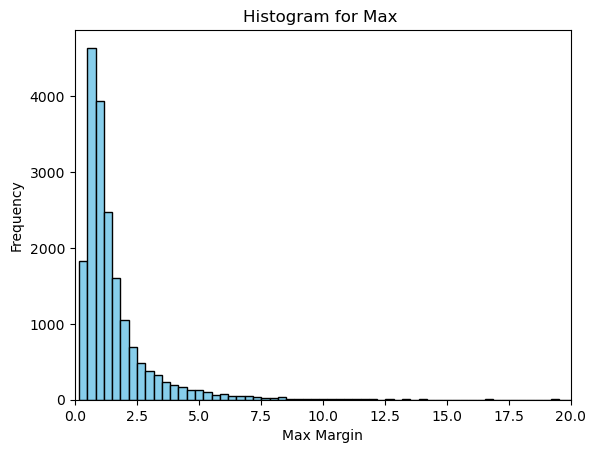

In [89]:
import matplotlib.pyplot as plt

plt.xlabel('Max Margin')
plt.ylabel('Frequency')
plt.title('Histogram for Max ')
plt.xlim(0, 20)

plt.hist(df["Max_Margin"], bins=100, color='skyblue', edgecolor='black')
plt.show()


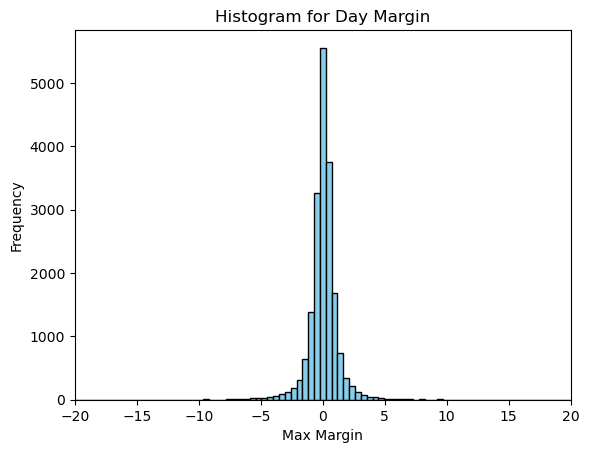

In [90]:
import matplotlib.pyplot as plt

plt.xlabel('Max Margin')
plt.ylabel('Frequency')
plt.title('Histogram for Day Margin')
plt.xlim(-20, 20)

plt.hist(df["Day_Margin"], bins=100, color='skyblue', edgecolor='black')
plt.show()

In [91]:
print(df["Max_Margin"].mean())
print(df["Day_Margin"].mean())

1.5465513846968493
0.03331740005295204


Max_margin would represent if you perfeclty timed the market vs buying at opening of a day and selling at closing. Though both methods on avg are still better than nothing is what this would mean

In [92]:
print("Max price is ", df["Max_Margin"].max())
print("Min price is ", df["Max_Margin"].min())

Max price is  33.56999999999999
Min price is  0.1700000000000017


There is a issue with the data here it shouldn't be possible for Max_Margin to be below 0 since it's calculated by subtracting low from high.

In [93]:
print("Max price is ", df["Day_Margin"].max())
print("Min price is ", df["Day_Margin"].min())

Max price is  20.04000000000002
Min price is  -27.099999999999994


# Looking into possible ROI

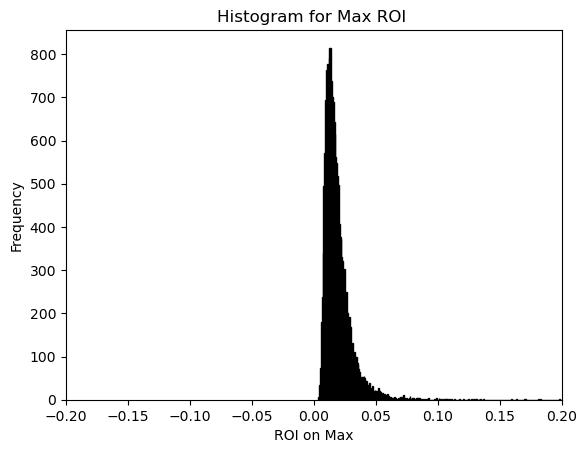

In [94]:
import matplotlib.pyplot as plt

plt.xlabel('ROI on Max')
plt.ylabel('Frequency')
plt.title('Histogram for Max ROI ')
plt.xlim(-.2, .2)

plt.hist(df["ROI_Max"], bins=300, color='skyblue', edgecolor='black')
plt.show()


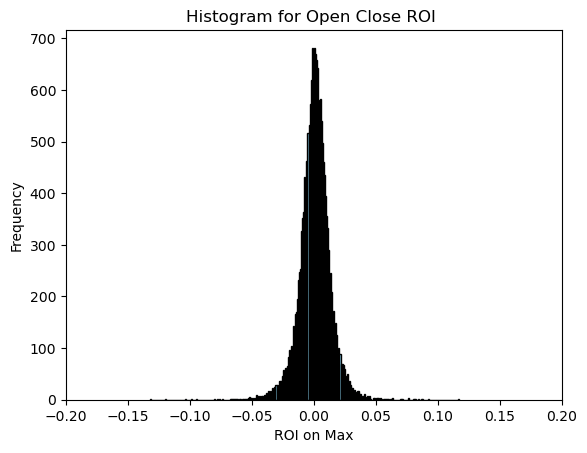

In [95]:
import matplotlib.pyplot as plt

plt.xlabel('ROI on Max')
plt.ylabel('Frequency')
plt.title('Histogram for Open Close ROI ')
plt.xlim(-.2, .2)

plt.hist(df["Day_ROI"], bins=300, color='skyblue', edgecolor='black')
plt.show()

# Correlation

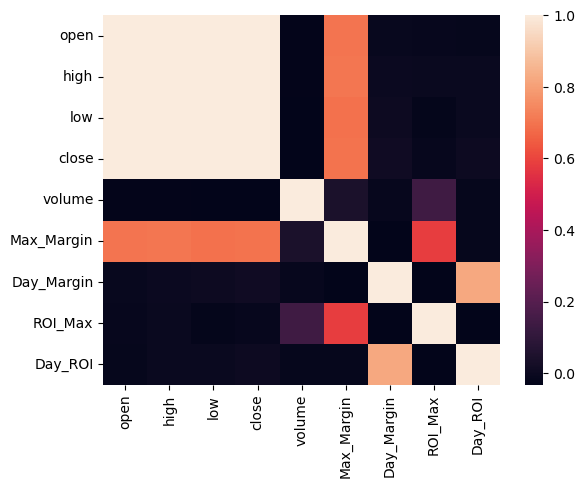

In [96]:
import seaborn as sns
sns.heatmap(df[["open","high","low","close","volume","Max_Margin","Day_Margin","ROI_Max","Day_ROI"]].corr());

The Fields that would be intresting to predict are Day_Margin, Day_ROI, Close, Low, High. Something intresting is Volume being a predicator for ROI. But most these fields have very low correlation for the ones we would know at infrence time. This would lead to the assumation that doing classifaction may not be possible though viewing as time series regression may be the best approach.

# Cleaning and Transformation

In [97]:
df.isna().any()

date          False
open          False
high          False
low           False
close         False
volume        False
Name          False
Max_Margin    False
Day_Margin    False
ROI_Max       False
Day_ROI       False
dtype: bool

Let's see how many nulls there are

In [98]:
len(df)

18885

In [99]:
df.dropna(subset=['open', "high","low", "close"], inplace=True)
df.isna().any()

date          False
open          False
high          False
low           False
close         False
volume        False
Name          False
Max_Margin    False
Day_Margin    False
ROI_Max       False
Day_ROI       False
dtype: bool

In [100]:
len(df)

18885

Since it's only 11 datapooints in the 619 thousand it's safe to just drop those 11.

# One hot encode Name

In [101]:
df['date'] = pd.to_datetime(df['date'])

df['unix_time'] = df['date'].astype('int64') // 10**9

In [102]:
df

,date,open,high,low,close,volume,Name,Max_Margin,Day_Margin,ROI_Max,Day_ROI,unix_time
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,0.49,-0.32,0.033493,-0.021234,1360281600
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,0.75,-0.43,0.052595,-0.028878,1360540800
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,0.41,-0.18,0.029078,-0.012457,1360627200
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.69,0.36,0.048421,0.025175,1360713600
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,1.80,-0.95,0.136778,-0.063588,1360800000
...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,68.74,68.98,67.66,67.84,2968573,AEP,1.32,-0.90,0.019509,-0.013093,1517443200
1255,2018-02-02,67.74,68.23,67.52,67.75,2800181,AEP,0.71,0.01,0.010515,0.000148,1517529600
1256,2018-02-05,67.82,68.42,66.30,66.48,4146484,AEP,2.12,-1.34,0.031976,-0.019758,1517788800
1257,2018-02-06,65.45,65.87,63.94,64.91,7872392,AEP,1.93,-0.54,0.030185,-0.008251,1517875200


In [103]:
df

,date,open,high,low,close,volume,Name,Max_Margin,Day_Margin,ROI_Max,Day_ROI,unix_time
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,0.49,-0.32,0.033493,-0.021234,1360281600
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,0.75,-0.43,0.052595,-0.028878,1360540800
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,0.41,-0.18,0.029078,-0.012457,1360627200
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.69,0.36,0.048421,0.025175,1360713600
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,1.80,-0.95,0.136778,-0.063588,1360800000
...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,68.74,68.98,67.66,67.84,2968573,AEP,1.32,-0.90,0.019509,-0.013093,1517443200
1255,2018-02-02,67.74,68.23,67.52,67.75,2800181,AEP,0.71,0.01,0.010515,0.000148,1517529600
1256,2018-02-05,67.82,68.42,66.30,66.48,4146484,AEP,2.12,-1.34,0.031976,-0.019758,1517788800
1257,2018-02-06,65.45,65.87,63.94,64.91,7872392,AEP,1.93,-0.54,0.030185,-0.008251,1517875200


In [104]:
df['date'] = pd.to_datetime(df['date'])

df['unix time'] = df['date'].astype('int64') // 10**9

# Example stock price over time

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name', 'Max_Margin',
       'Day_Margin', 'ROI_Max', 'Day_ROI', 'unix_time', 'unix time'],
      dtype='object')


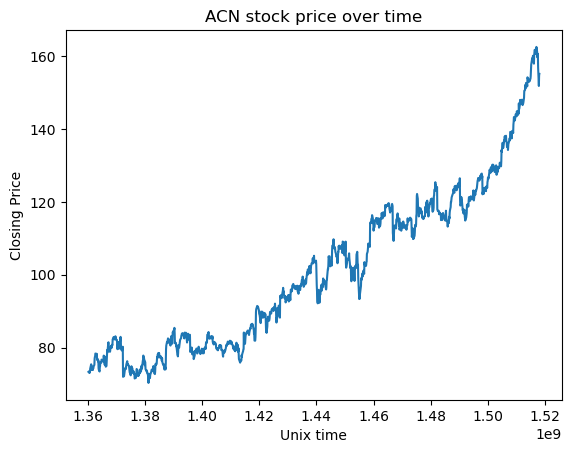

In [105]:
import matplotlib.pyplot as plt

# Check the columns in the DataFrame to ensure correct naming
print(df.columns)

# Replace 'Name_XYL' with the correct column name, for example, if 'Name' is the column for stock names
stock_name = "ACN"
df_stock = df[df["Name"] == stock_name]

plt.xlabel('Unix time')
plt.ylabel('Closing Price')
plt.title(f'{stock_name} stock price over time')
plt.plot(df_stock["unix time"], df_stock["close"])
plt.show()


# Models

LSTM

In [112]:
!pip install tensorflow pandas numpy scikit-learn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [113]:


import os
import pandas as pd

# Get a list of all CSV files in the target directory
csv_files = [f for f in os.listdir('dataset') if f.endswith('.csv')]

# Create an empty list to store the dataframes
dfs = []

# Iterate over the CSV files and read them into dataframes
for file in csv_files:
    df = pd.read_csv(os.path.join('dataset', file))
    dfs.append(df)

# Concatenate all the dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined dataframe to a CSV file
combined_df.to_csv('dataset.csv', index=False)


In [114]:
# Load the data
data = pd.read_csv('dataset.csv')  # Replace with your file path

# Assume the data has 'Date' and 'Close' columns
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['close'].values.reshape(-1,1))

# Prepare training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for LSTM
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 60
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [115]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=32, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=32, return_sequences=False))
model.add(Dense(units=16))  # Reduce units for faster training
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=2, verbose=1)

Epoch 1/2
15475/15475 [==============================] - 164s 10ms/step - loss: 2.0641e-05
Epoch 2/2
15475/15475 [==============================] - 161s 10ms/step - loss: 1.1060e-05


3868/3868 [==============================] - 14s 3ms/step


C:\Users\Nathan\AppData\Local\Temp\ipykernel_8560\2023205390.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions[:len(valid)]


Root Mean Squared Error: 2.7890503063853003


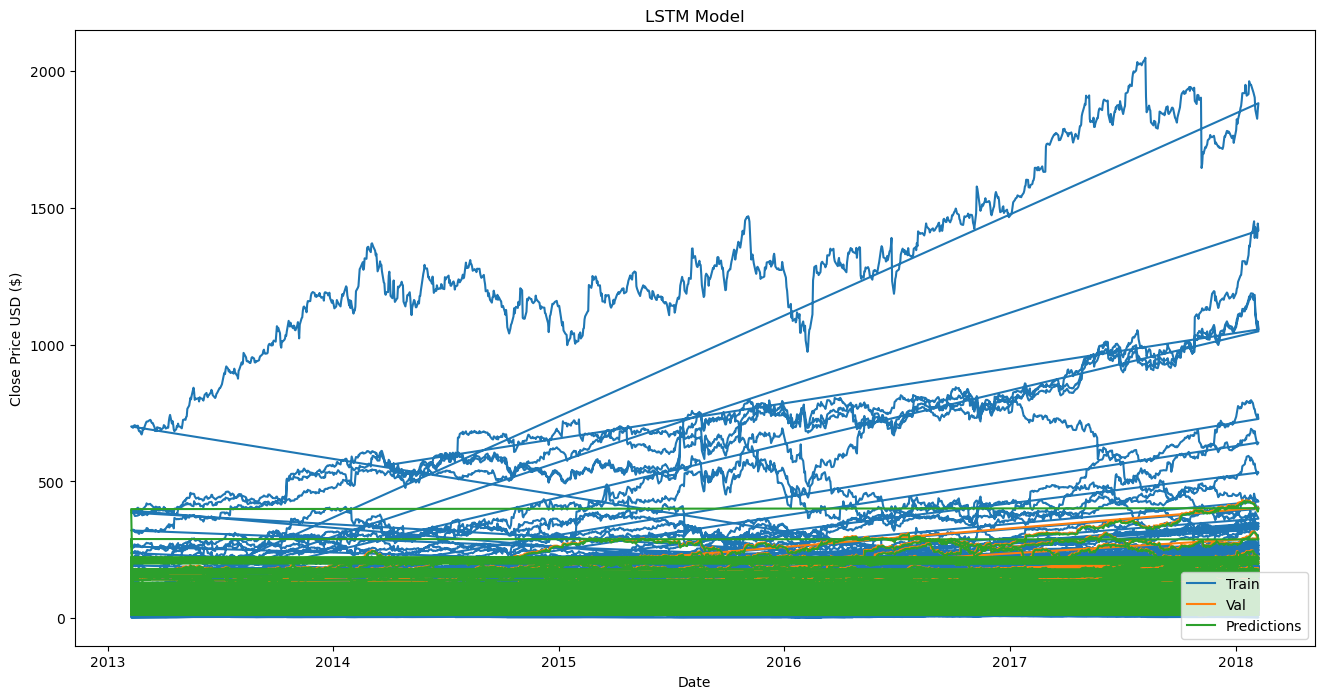

In [116]:
# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Adjust valid dataset to match the predictions length
valid = data[train_size + seq_length:]

# Ensure valid index matches the length of predictions
valid['Predictions'] = predictions[:len(valid)]

# Calculate RMSE
rmse = np.sqrt(np.mean((valid['close'].values - valid['Predictions'].values) ** 2))
print(f'Root Mean Squared Error: {rmse}')

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(data['close'][:train_size + seq_length])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [121]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


def metrics(Y_pred, Y_true):
    print("r2 score is : ",r2_score(Y_true,Y_pred))
    

In [122]:
metrics(valid['close'].values ,valid['Predictions'].values)


r2 score is :  0.996173787229086


In [123]:
valid['Predictions'].values.mean()

76.68774

In [124]:
valid['Predictions'].values.std()

45.08912

Support Vector Machine (SVR) Model

In [125]:
!pip install pandas numpy scikit-learn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [126]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

model = SVR(gamma=0.5)

In [127]:
model.fit(x_train.reshape(x_train.shape[0], -1), y_train)

SVR(gamma=0.5)

In [128]:
pred = model.predict(x_test.reshape(x_test.shape[0], -1))

In [129]:
metrics(pred, y_test)

r2 score is :  -8.310483998594092


# ANN flatten Approach

### Flatten the data

In [130]:
x_train.shape

(495172, 60, 1)

In [131]:
reshaped = x_train.reshape(x_train.shape[0], -1)

In [132]:
reshaped.shape

(495172, 60)

### Create a ANN using Pytorch

In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [158]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(60, 128) 
        self.fc4 = nn.Linear(128, 256)
        self.fc5 = nn.Linear(256, 512)
        self.fc6 = nn.Linear(512, 128)
        self.fc7 = nn.Linear(128, 64)
        self.fc8 = nn.Linear(64, 32)
        self.fc9 = nn.Linear(32, 16)
        self.fc10 = nn.Linear(16, 1)
    def forward(self, input):
     
        l1 = F.relu(self.fc1(input))
        l4 = F.relu(self.fc4(l1))
        l5 = F.relu(self.fc5(l4))
        l6 = F.relu(self.fc6(l5))
        l7 = F.relu(self.fc7(l6))
        l8 = F.relu(self.fc8(l7))
        l9 = F.relu(self.fc9(l8))
        output = (self.fc10(l9))

        return output


In [159]:
ANN = Net()

In [160]:
ANN.forward(torch.tensor(reshaped[0]).float())

tensor([-0.0158], grad_fn=<ViewBackward0>)

### Train

In [161]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(ANN.parameters(), lr=0.00001)

In [162]:
print(len(y_train))

495172


In [163]:
reshaped.shape

(495172, 60)

In [164]:
import time
start_time = time.time()
loss_t = []
for epoch in range(3):
    idx = 0
    loss_curr = 0
    pred = []
    for inputs, truth in zip(reshaped, y_train):
        idx += 1
        optimizer.zero_grad()
        outputs = ANN(torch.tensor(inputs).float())
        loss = loss_fn(outputs, torch.tensor(truth).float())
        loss_curr += loss
        loss.backward()
        optimizer.step()
        if(idx%5000 == 0):
            elapased_time =  time.time() - start_time
            
            print('Time (minutes) : {} Epoch : {} Sample : {} loss: {}'.format(elapased_time/60, epoch, idx, loss_curr/idx))
    loss_t.append(loss_curr)

C:\Users\Nathan\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Time (minutes) : 0.24978255828221638 Epoch : 0 Sample : 5000 loss: 4.507128687691875e-05
Time (minutes) : 0.5264910817146301 Epoch : 0 Sample : 10000 loss: 3.72380563931074e-05
Time (minutes) : 0.803999662399292 Epoch : 0 Sample : 15000 loss: 4.427220846991986e-05
Time (minutes) : 1.0907998005549113 Epoch : 0 Sample : 20000 loss: 5.756724567618221e-05
Time (minutes) : 1.3855833371480306 Epoch : 0 Sample : 25000 loss: 5.611734013655223e-05
Time (minutes) : 1.682058540980021 Epoch : 0 Sample : 30000 loss: 4.7602465201634914e-05
Time (minutes) : 1.9784920771916708 Epoch : 0 Sample : 35000 loss: 5.143437738297507e-05
Time (minutes) : 2.287783948580424 Epoch : 0 Sample : 40000 loss: 4.8086800234159455e-05
Time (minutes) : 2.608575983842214 Epoch : 0 Sample : 45000 loss: 4.582979454426095e-05
Time (minutes) : 2.9337928732236227 Epoch : 0 Sample : 50000 loss: 0.00025049675605259836
Time (minutes) : 3.281159782409668 Epoch : 0 Sample : 55000 loss: 0.00023295370920095593
Time (minutes) : 3.6314

In [166]:
y_pred = ANN.forward(torch.tensor(x_test.reshape(x_test.shape[0], -1)).float())

In [167]:
np_arr = y_pred.detach().cpu().numpy()

In [168]:
metrics(np_arr, y_test)

r2 score is :  0.7597941466645467


In [169]:
torch.save(ANN.state_dict(), "Model.pth")

# CNN Approach 

# Coverting image to 

In [170]:
reshaped.shape

(495172, 60)

In [189]:
image_arr = reshaped.reshape(495172, 1, 1, 6, 10) # 1 Channel , 1 Batch


In [205]:
test_image = (x_test.reshape(x_test.shape[0], -1)).reshape(123748, 1, 6, 10) # 1 Channel , 1 Batch


In [173]:
from PIL import Image
import numpy as np

# Example of a image Just to show

In [174]:
image_arr[0]

array([[[[0.00642763, 0.00628599, 0.00619319, 0.00638367, 0.00605643,
          0.00630553, 0.00618831, 0.00573407, 0.00575361, 0.0058513 ],
         [0.00558266, 0.00569988, 0.00577315, 0.00578292, 0.00587083,
          0.00601247, 0.00608574, 0.00633972, 0.00646182, 0.00651066],
         [0.00661323, 0.00679395, 0.0069942 , 0.00716027, 0.00702839,
          0.0071798 , 0.00741913, 0.00763892, 0.00752658, 0.0074582 ],
         [0.00733121, 0.00728726, 0.00735563, 0.00751193, 0.0073654 ,
          0.00691117, 0.0068086 , 0.00688675, 0.0069014 , 0.00696001],
         [0.00689163, 0.00693071, 0.00713096, 0.00710654, 0.00683791,
          0.00721888, 0.00729214, 0.007087  , 0.00704793, 0.00680372],
         [0.00718469, 0.00725795, 0.00714561, 0.00732633, 0.00743378,
          0.00747774, 0.00733121, 0.00749728, 0.00753635, 0.00752658]]]])

# Creating model

In [175]:
import torch.nn as nn
import torch.nn.functional as F
import torch

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 1)
        self.fc1 = nn.Linear(32, 16)
        self.fc2 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu((self.fc1(x)))
        x =  self.fc2(x)
        return x



In [176]:
model = Net()

In [179]:
model(torch.tensor(image_arr[0]).float())

tensor([[-0.2172]], grad_fn=<AddmmBackward0>)

### Training

In [180]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)

In [181]:
import time
start_time = time.time()
loss_t = []
for epoch in range(3):
    idx = 0
    loss_curr = 0
    pred = []
    for inputs, truth in zip(image_arr, y_train):
        idx += 1
        optimizer.zero_grad()
        outputs = model(torch.tensor(inputs).float())
        loss = loss_fn(outputs, torch.tensor(truth).float())
        loss_curr += loss
        loss.backward()
        optimizer.step()
        if(idx%5000 == 0):
            elapased_time =  time.time() - start_time
            
            print('Time (minutes) : {} Epoch : {} Sample : {} loss: {}'.format(elapased_time/60, epoch, idx, loss_curr/idx))
    loss_t.append(loss_curr)

C:\Users\Nathan\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Time (minutes) : 1.751763641834259 Epoch : 0 Sample : 5000 loss: 0.015997709706425667
Time (minutes) : 1.8382470289866129 Epoch : 0 Sample : 10000 loss: 0.008045782335102558
Time (minutes) : 1.9226596474647522 Epoch : 0 Sample : 15000 loss: 0.005393053870648146
Time (minutes) : 2.0051347176233927 Epoch : 0 Sample : 20000 loss: 0.004133663605898619
Time (minutes) : 2.1147347768147786 Epoch : 0 Sample : 25000 loss: 0.0033611920662224293
Time (minutes) : 2.214784848690033 Epoch : 0 Sample : 30000 loss: 0.0028025477658957243
Time (minutes) : 2.318234916528066 Epoch : 0 Sample : 35000 loss: 0.0024242631625384092
Time (minutes) : 2.474743354320526 Epoch : 0 Sample : 40000 loss: 0.002125958912074566
Time (minutes) : 2.5859184424082438 Epoch : 0 Sample : 45000 loss: 0.0018956864951178432
Time (minutes) : 2.6830184976259868 Epoch : 0 Sample : 50000 loss: 0.0026275997515767813
Time (minutes) : 2.7810518980026244 Epoch : 0 Sample : 55000 loss: 0.0024004289880394936
Time (minutes) : 2.877593636512

### Validation

In [207]:
y_pred = model(torch.tensor(test_image).float())
np_arr = y_pred.detach().cpu().numpy()

In [209]:
metrics(np_arr, y_test)

r2 score is :  0.6798959938206482
